In [85]:
#Criar variavel com a georeferência da area a ser estudada(instalar geopandas,)

#import dos dados
#transformar dados
#selecionar dados a serem estudados
# analise exploratória
#plotar dados
#salvar e disponibilizar dados 


In [142]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Locale: Utilizado para formatação de datas, valores, dias de acordo com a região que queremos.
import locale 
#Warnings: Possui detalhes sobre os avisos e alertas que aparecem, porém podemos utiliza-lo também para que os alertas de
#futuras atualizações e metodos depreciados não sejam exibidos
import warnings
warnings.filterwarnings("ignore")
#comando utilizado para exibir todas as colunas
pd.set_option('display.max_columns',None)
import shapely.geometry 
#import Point


Gerando dados geoespaciais para criarmos o mapa:
#dados importados do site do IBGE: https://www.ibge.gov.br/geocienciasorganizacao-do-territorio/malhas-territoriais/15774-malhas.html?=&t=acesso-ao-produto

In [143]:
#importando arquivo contendo georeferencia
dados_municipios=gpd.read_file("SP_Municipios_2021/")
dados_municipios.head()


,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."


In [144]:
#type(dados_municipios)


<AxesSubplot:>

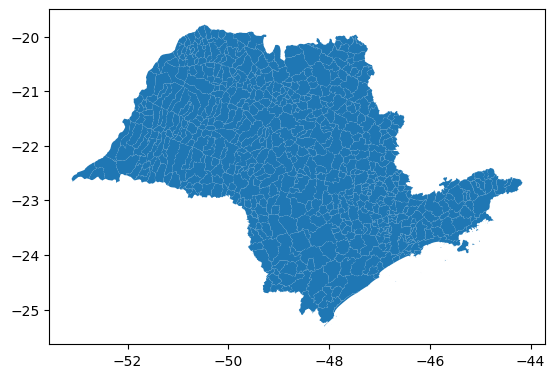

In [145]:
#aqui estamoos visualizando os dados contidos geografico do Estado de SP separado por municipio
dados_municipios.plot()

In [146]:
# aqui temos uam melhor visualização dos dados
#gdf_municipios_sp=dados_municipios.plot(figsize=(10,5),facecolor='white',edgecolor='black')
#plt.show()

In [150]:
#Aqui vamos salvar o mapa que cria
dados_municipios.to_file('dadosmunicipios.json',driver='GeoJSON')

Agora vamos importar e analisar os dados

In [159]:
# Criando variavel principal
dados_rveiculos=pd.read_excel('dadosBO_2022_10_roubo_de_veiculos_sp.xlsx')

In [160]:
dados_rveiculos.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2022,1710084,1710084/2022,2022-10-01 00:03:07,2022-10-01 00:03:11,2022-09-30,20:30:00,A NOITE,2022-09-30,2022-10-01 00:03:07,Desconhecida,Não,NaN,RUA JORGE NEWBERY,92,JACANA,S.PAULO,SP,-23.481049,-46.566076,Garagem ou abrigo de residência,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,73º D.P. JACANA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUX4246,SP,S.PAULO,Prata,HONDA/CITY DX FLEX,2011.0,NaN,AUTOMOVEL,NaN,NaN
1,2022,1710085,1710085/2022,2022-10-01 00:08:33,2022-10-01 00:08:40,2022-09-30,18:00:00,A NOITE,2022-09-30,2022-10-01 00:08:33,Desconhecida,Não,NaN,RUA PARATINGA,81,CONCEICAO,DIADEMA,SP,-23.702040,-46.620427,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,01º D.P. DIADEMA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DXF9J96,SP,DIADEMA,Vermelho,I/TOYOTA COROLLA,2022.0,NaN,AUTOMOVEL,NaN,NaN
2,2022,2381,2381/2022,2022-10-01 00:17:11,2022-10-01 00:17:11,2022-09-30,23:30:00,A NOITE,2022-09-30,2022-10-01 00:17:11,Desconhecida,Não,NaN,RUA JOSE RAFAELLI,272,SOCORRO,S.PAULO,SP,-23.666840,-46.722660,Via pública,NaN,BO PARA INVESTIGAÇÃO,102º D.P. SOCORRO,102º D.P. SOCORRO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FNW7B16,SP,S.PAULO,Branco,HONDA/ADV 150,2021.0,2022.0,MOTONETA,NaN,NaN
3,2022,7423,7423/2022,2022-10-01 00:20:03,2022-10-01 00:20:03,2022-09-30,20:00:00,A NOITE,2022-09-30,2022-10-01 00:20:03,Conhecida,Sim,NaN,Avenida Senador Lacerda Franco,970,Jardim do Lago,CAMPINAS,SP,-22.936142,-47.088884,Via pública,NaN,BO PARA FLAGRANTE,PLANTÃO - 01 DP CAMPINAS,02º D.P. CAMPINAS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBT1A77,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,NaN,NaN
4,2022,1710093,1710093/2022,2022-10-01 00:28:14,2022-10-01 00:28:20,2022-09-30,20:00:00,A NOITE,2022-09-30,2022-10-01 00:28:14,Desconhecida,Não,NaN,Avenida Carlos Caldeira Filho,31,Vila Prel,S.PAULO,SP,-23.645960,-46.753704,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,37º D.P. CAMPO LIMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEA7G37,SP,S.PAULO,Azul,YAMAHA/FZ25 FAZER,2022.0,NaN,MOTOCICLO,NaN,NaN


In [161]:
# verificar como estão organizados os dados de latidute e  longitude no nosso mapa
dados_rveiculos[['LATITUDE','LONGITUDE']]


,LATITUDE,LONGITUDE
0,-23.481049,-46.566076
1,-23.702040,-46.620427
2,-23.666840,-46.722660
3,-22.936142,-47.088884
4,-23.645960,-46.753704
...,...,...
13834,-23.649012,-46.490679
13835,-23.649012,-46.490679
13836,-23.651202,-46.575947
13837,-23.558067,-46.403499


In [162]:
dados_rveiculos.info()
#Aqui estamos vendo que existem celulas onde temos ados núlos, sendo assim não podemos utilizar estas células
dados_rveiculos.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13839 entries, 0 to 13838
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ANO_BO                    13839 non-null  int64         
 1   NUM_BO                    13839 non-null  int64         
 2   NUMERO_BOLETIM            13839 non-null  object        
 3   BO_INICIADO               13839 non-null  datetime64[ns]
 4   BO_EMITIDO                13839 non-null  datetime64[ns]
 5   DATAOCORRENCIA            13839 non-null  datetime64[ns]
 6   HORAOCORRENCIA            13462 non-null  object        
 7   PERIDOOCORRENCIA          13839 non-null  object        
 8   DATACOMUNICACAO           13839 non-null  datetime64[ns]
 9   DATAELABORACAO            13839 non-null  datetime64[ns]
 10  BO_AUTORIA                13839 non-null  object        
 11  FLAGRANTE                 13839 non-null  object        
 12  NUMERO_BOLETIM_PRI

ANO_BO                          0
NUM_BO                          0
NUMERO_BOLETIM                  0
BO_INICIADO                     0
BO_EMITIDO                      0
DATAOCORRENCIA                  0
HORAOCORRENCIA                377
PERIDOOCORRENCIA                0
DATACOMUNICACAO                 0
DATAELABORACAO                  0
BO_AUTORIA                      0
FLAGRANTE                       0
NUMERO_BOLETIM_PRINCIPAL     7506
LOGRADOURO                    708
NUMERO                          0
BAIRRO                        455
CIDADE                          0
UF                              0
LATITUDE                     1266
LONGITUDE                    1266
DESCRICAOLOCAL                  0
EXAME                       13839
SOLUCAO                         0
DELEGACIA_NOME                  0
DELEGACIA_CIRCUNSCRICAO         0
ESPECIE                         0
RUBRICA                         0
DESDOBRAMENTO               13784
STATUS                          0
TIPOPESSOA    

In [163]:
dados_rveiculos=dados_rveiculos.dropna(subset= ['LATITUDE','LONGITUDE'])
dados_rveiculos.info()
dados_rveiculos.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12573 entries, 0 to 13838
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ANO_BO                    12573 non-null  int64         
 1   NUM_BO                    12573 non-null  int64         
 2   NUMERO_BOLETIM            12573 non-null  object        
 3   BO_INICIADO               12573 non-null  datetime64[ns]
 4   BO_EMITIDO                12573 non-null  datetime64[ns]
 5   DATAOCORRENCIA            12573 non-null  datetime64[ns]
 6   HORAOCORRENCIA            12234 non-null  object        
 7   PERIDOOCORRENCIA          12573 non-null  object        
 8   DATACOMUNICACAO           12573 non-null  datetime64[ns]
 9   DATAELABORACAO            12573 non-null  datetime64[ns]
 10  BO_AUTORIA                12573 non-null  object        
 11  FLAGRANTE                 12573 non-null  object        
 12  NUMERO_BOLETIM_PRI

ANO_BO                          0
NUM_BO                          0
NUMERO_BOLETIM                  0
BO_INICIADO                     0
BO_EMITIDO                      0
DATAOCORRENCIA                  0
HORAOCORRENCIA                339
PERIDOOCORRENCIA                0
DATACOMUNICACAO                 0
DATAELABORACAO                  0
BO_AUTORIA                      0
FLAGRANTE                       0
NUMERO_BOLETIM_PRINCIPAL     6877
LOGRADOURO                      0
NUMERO                          0
BAIRRO                        391
CIDADE                          0
UF                              0
LATITUDE                        0
LONGITUDE                       0
DESCRICAOLOCAL                  0
EXAME                       12573
SOLUCAO                         0
DELEGACIA_NOME                  0
DELEGACIA_CIRCUNSCRICAO         0
ESPECIE                         0
RUBRICA                         0
DESDOBRAMENTO               12526
STATUS                          0
TIPOPESSOA    

In [164]:
dados_rveiculos.head()


,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2022,1710084,1710084/2022,2022-10-01 00:03:07,2022-10-01 00:03:11,2022-09-30,20:30:00,A NOITE,2022-09-30,2022-10-01 00:03:07,Desconhecida,Não,NaN,RUA JORGE NEWBERY,92,JACANA,S.PAULO,SP,-23.481049,-46.566076,Garagem ou abrigo de residência,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,73º D.P. JACANA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUX4246,SP,S.PAULO,Prata,HONDA/CITY DX FLEX,2011.0,NaN,AUTOMOVEL,NaN,NaN
1,2022,1710085,1710085/2022,2022-10-01 00:08:33,2022-10-01 00:08:40,2022-09-30,18:00:00,A NOITE,2022-09-30,2022-10-01 00:08:33,Desconhecida,Não,NaN,RUA PARATINGA,81,CONCEICAO,DIADEMA,SP,-23.702040,-46.620427,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,01º D.P. DIADEMA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DXF9J96,SP,DIADEMA,Vermelho,I/TOYOTA COROLLA,2022.0,NaN,AUTOMOVEL,NaN,NaN
2,2022,2381,2381/2022,2022-10-01 00:17:11,2022-10-01 00:17:11,2022-09-30,23:30:00,A NOITE,2022-09-30,2022-10-01 00:17:11,Desconhecida,Não,NaN,RUA JOSE RAFAELLI,272,SOCORRO,S.PAULO,SP,-23.666840,-46.722660,Via pública,NaN,BO PARA INVESTIGAÇÃO,102º D.P. SOCORRO,102º D.P. SOCORRO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FNW7B16,SP,S.PAULO,Branco,HONDA/ADV 150,2021.0,2022.0,MOTONETA,NaN,NaN
3,2022,7423,7423/2022,2022-10-01 00:20:03,2022-10-01 00:20:03,2022-09-30,20:00:00,A NOITE,2022-09-30,2022-10-01 00:20:03,Conhecida,Sim,NaN,Avenida Senador Lacerda Franco,970,Jardim do Lago,CAMPINAS,SP,-22.936142,-47.088884,Via pública,NaN,BO PARA FLAGRANTE,PLANTÃO - 01 DP CAMPINAS,02º D.P. CAMPINAS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBT1A77,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,NaN,NaN
4,2022,1710093,1710093/2022,2022-10-01 00:28:14,2022-10-01 00:28:20,2022-09-30,20:00:00,A NOITE,2022-09-30,2022-10-01 00:28:14,Desconhecida,Não,NaN,Avenida Carlos Caldeira Filho,31,Vila Prel,S.PAULO,SP,-23.645960,-46.753704,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,37º D.P. CAMPO LIMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEA7G37,SP,S.PAULO,Azul,YAMAHA/FZ25 FAZER,2022.0,NaN,MOTOCICLO,NaN,NaN


Linhas com os valores núlos foram limpas, podemos ver que diminuimos a quantidade de linhas, porém não interfere no modelo

In [165]:
dados_rveiculos['geometry'] = None

for index, row in dados_rveiculos.iterrows():
    dados_rveiculos.loc[index,'geometry'] = Point(row.LONGITUDE,row.LATITUDE)
   


    

In [166]:
#Visualizando a variável criada 
dados_rveiculos.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
0,2022,1710084,1710084/2022,2022-10-01 00:03:07,2022-10-01 00:03:11,2022-09-30,20:30:00,A NOITE,2022-09-30,2022-10-01 00:03:07,Desconhecida,Não,NaN,RUA JORGE NEWBERY,92,JACANA,S.PAULO,SP,-23.481049,-46.566076,Garagem ou abrigo de residência,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,73º D.P. JACANA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUX4246,SP,S.PAULO,Prata,HONDA/CITY DX FLEX,2011.0,NaN,AUTOMOVEL,NaN,NaN,POINT (-46.566076401504 -23.4810489899443)
1,2022,1710085,1710085/2022,2022-10-01 00:08:33,2022-10-01 00:08:40,2022-09-30,18:00:00,A NOITE,2022-09-30,2022-10-01 00:08:33,Desconhecida,Não,NaN,RUA PARATINGA,81,CONCEICAO,DIADEMA,SP,-23.702040,-46.620427,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,01º D.P. DIADEMA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DXF9J96,SP,DIADEMA,Vermelho,I/TOYOTA COROLLA,2022.0,NaN,AUTOMOVEL,NaN,NaN,POINT (-46.6204272958686 -23.7020403512951)
2,2022,2381,2381/2022,2022-10-01 00:17:11,2022-10-01 00:17:11,2022-09-30,23:30:00,A NOITE,2022-09-30,2022-10-01 00:17:11,Desconhecida,Não,NaN,RUA JOSE RAFAELLI,272,SOCORRO,S.PAULO,SP,-23.666840,-46.722660,Via pública,NaN,BO PARA INVESTIGAÇÃO,102º D.P. SOCORRO,102º D.P. SOCORRO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FNW7B16,SP,S.PAULO,Branco,HONDA/ADV 150,2021.0,2022.0,MOTONETA,NaN,NaN,POINT (-46.722659595 -23.6668399179999)
3,2022,7423,7423/2022,2022-10-01 00:20:03,2022-10-01 00:20:03,2022-09-30,20:00:00,A NOITE,2022-09-30,2022-10-01 00:20:03,Conhecida,Sim,NaN,Avenida Senador Lacerda Franco,970,Jardim do Lago,CAMPINAS,SP,-22.936142,-47.088884,Via pública,NaN,BO PARA FLAGRANTE,PLANTÃO - 01 DP CAMPINAS,02º D.P. CAMPINAS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBT1A77,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,NaN,NaN,POINT (-47.0888835 -22.936142)
4,2022,1710093,1710093/2022,2022-10-01 00:28:14,2022-10-01 00:28:20,2022-09-30,20:00:00,A NOITE,2022-09-30,2022-10-01 00:28:14,Desconhecida,Não,NaN,Avenida Carlos Caldeira Filho,31,Vila Prel,S.PAULO,SP,-23.645960,-46.753704,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,37º D.P. CAMPO LIMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEA7G37,SP,S.PAULO,Azul,YAMAHA/FZ25 FAZER,2022.0,NaN,MOTOCICLO,NaN,NaN,POINT (-46.7537041 -23.6459599)


In [167]:
#criando Geodataframe
gdf_rveiculos=gpd.GeoDataFrame(dados_rveiculos,geometry='geometry')

In [168]:
type(gdf_rveiculos)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

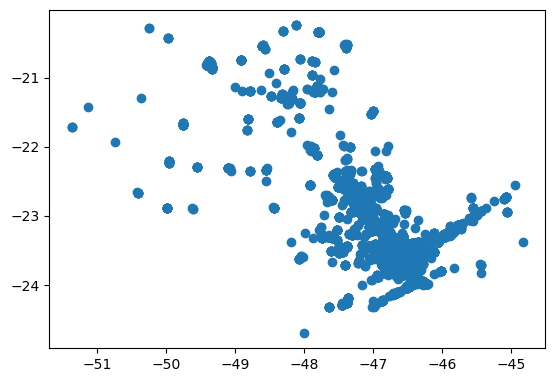

In [169]:
gdf_rveiculos.plot()

In [171]:
arquivomapa='dadosmunicipios.json'
gdf_dados_mapa= gpd.read_file(arquivomapa,driver='GeoJSON')


<AxesSubplot:>

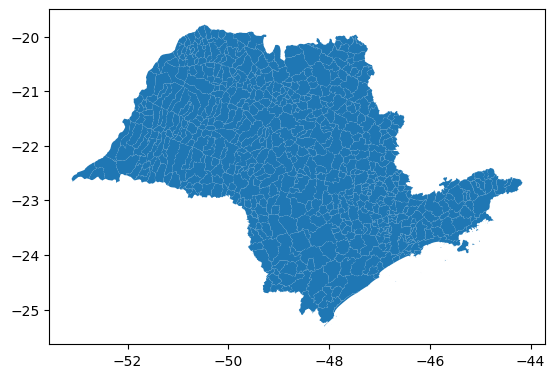

In [172]:
gdf_dados_mapa.plot()

<AxesSubplot:>

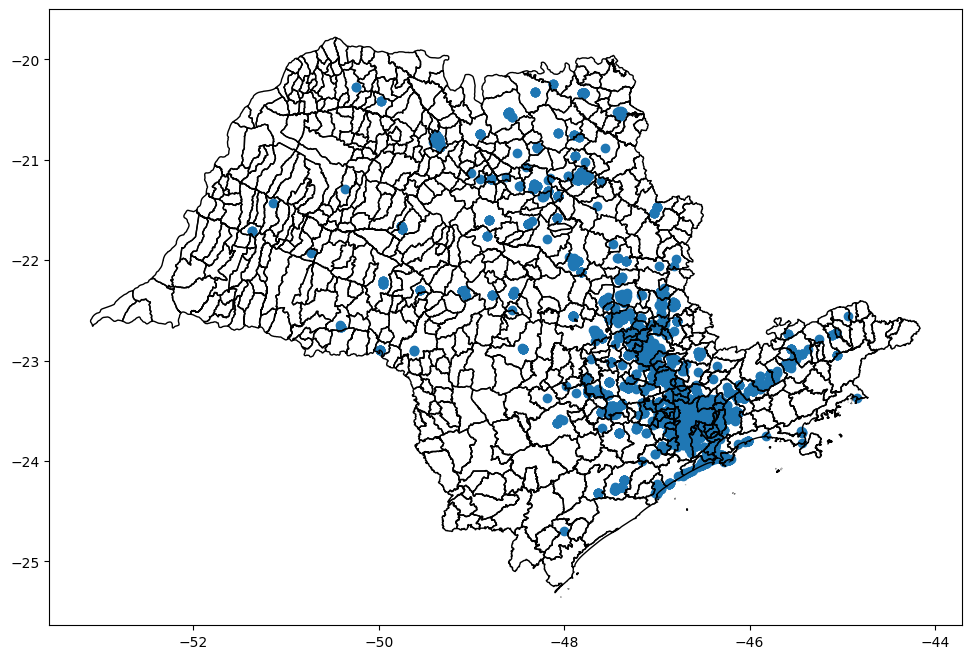

In [174]:
fig, ax= plt.subplots(figsize=(12,8))
gdf_rveiculos.plot(ax=ax)
gdf_dados_mapa.plot(ax=ax, facecolor='none',edgecolor='black')

In [175]:
gdf_rveiculos.intersection(gdf_dados_mapa)

0        POINT EMPTY
1        POINT EMPTY
2        POINT EMPTY
3        POINT EMPTY
4        POINT EMPTY
            ...     
13834           None
13835           None
13836           None
13837           None
13838           None
Length: 12631, dtype: geometry